#### 12.03.24, &copy; [Evhenii Kostin](https://www.linkedin.com/in/%D0%B5%D0%B2%D0%B3%D0%B5%D0%BD%D0%B8%D0%B9-%D0%BA%D0%BE%D1%81%D1%82%D0%B8%D0%BD-8287b0264/), 2024

# Лабораторна робота №7. Методи кластеризації (навчання без учителя)

__Мета:__ _закріпити на практиці концепцію алгоритмів кластеризації k-means, DBSCAN та агломеративних засобами мови Python._

# Завдання для самостійної роботи
1. Реалізувати всі алгоритми кластеризації, наведені в роботі, для свого варіанта, обгрунтувавши знаення відповідних параметрів.

## Алгоритм K-середніх

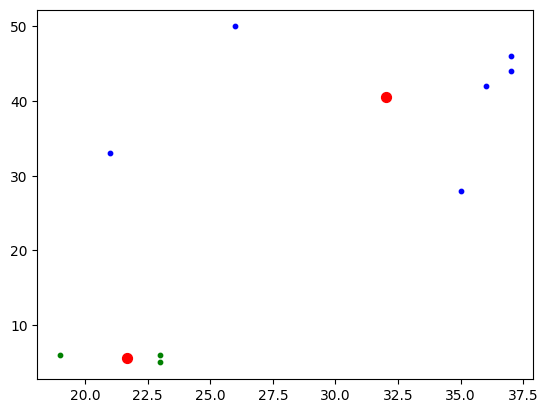

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Ваші дані
x_train_9 = np.array([[37, 46],
                      [26, 50],
                      [23, 6],
                      [21, 33],
                      [36, 42],
                      [37, 44],
                      [19, 6],
                      [23, 5],
                      [35, 28]])

y_train_9 = np.array([1, -1, 1, 1, -1, 1, -1, 1, 1])

# Адаптація даних до формату вихідного алгоритму
x = x_train_9

# Обчислення середніх та дисперсій
M = np.mean(x, axis=0)
D = np.var(x, axis=0)

# Визначення кількості кластерів
K = len(np.unique(y_train_9))

# Генерація початкових центрів кластерів
ma = [np.random.normal(M, np.sqrt(D / 10), 2) for n in range(K)]

# Функція для обчислення евклідової метрики
ro = lambda x_vect, m_vect: np.mean((x_vect - m_vect) ** 2)

# Колірування кластерів
COLORS = ('green', 'blue', 'brown', 'black')

# Ініціалізація графіка
plt.ion()

n = 0
while n < 10:
    X = [[] for i in range(K)]

    for x_vect, y_label in zip(x, y_train_9):
        r = [ro(x_vect, m) for m in ma]
        X[np.argmin(r)].append(x_vect)

    ma = [np.mean(xx, axis=0) for xx in X]

    plt.clf()

    # Відображення кластерів
    for i in range(K):
        xx = np.array(X[i]).T
        plt.scatter(xx[0], xx[1], s=10, color=COLORS[i])

    # Відображення центрів кластерів
    mx = [m[0] for m in ma]
    my = [m[1] for m in ma]
    plt.scatter(mx, my, s=50, color='red')

    plt.draw()
    plt.gcf().canvas.flush_events()

    n += 1

plt.ioff()
plt.show()

## Алгоритм DBSCAN

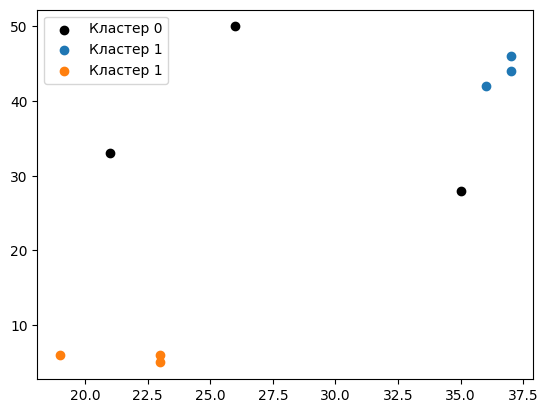

In [3]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Дані
x_train_9 = np.array([[37, 46], [26, 50], [23, 6], [21, 33], [36, 42], [37, 44], [19, 6], [23, 5], [35, 28]])
y_train_9 = np.array([1, -1, 1, 1, -1, 1, -1, 1, 1])

# Розмір епсилон-околу
eps = 10
# Мінімальна кількість об'єктів для повного епсилон-околу
m = 2

# Використання алгоритму DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=m)
dbscan.fit(x_train_9)
labels = dbscan.labels_

# Вивід кластерів
unique_labels = np.unique(labels)
for label in unique_labels:
    if label == -1:
        plt.scatter(x_train_9[labels == label][:, 0], x_train_9[labels == label][:, 1], color='k', label='Кластер 0')
    else:
        plt.scatter(x_train_9[labels == label][:, 0], x_train_9[labels == label][:, 1], label='Кластер 1')

plt.legend()
plt.show()

## Алгоритм K-середніх

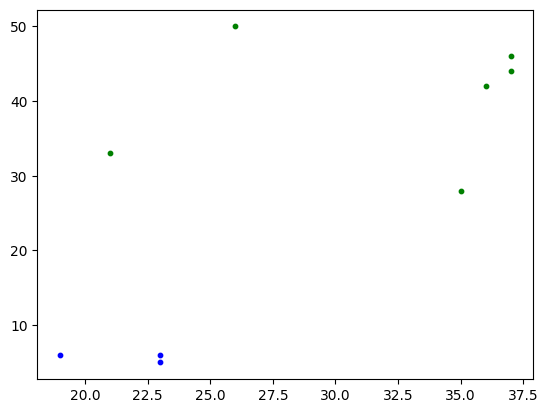

In [4]:
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# вхідні зображення для кластеризації
x = np.array([[37, 46], [26, 50], [23, 6], [21, 33], [36, 42], [37, 44], [19, 6], [23, 5], [35, 28]])

NC = 2  # максимальна кількість кластерів (кінцевих)

# використання алгоритму KMeans
kmeans = KMeans(n_clusters=NC)
kmeans.fit(x)
x_pr = kmeans.predict(x)

# відображення результату кластеризації
for c, n in zip(cycle('bgrcmykgrcmykgrcmykgrcmykgrcmykgrcmyk'), range(NC)):
    clst = x[x_pr == n].T
    plt.scatter(clst[0], clst[1], s=10, color=c)

plt.show()

<h2 align="center">Відповіді на контрольні запитання</h2>

#### 1.Задача кластеризації та її цілі:

_Кластеризація полягає в групуванні схожих об'єктів у колекції. Основна мета - забезпечити, щоб об'єкти всередині кожного кластера були якомога більш схожими між собою, в той час як об'єкти між різними кластерами були якомога менш схожими. Основні цілі кластеризації включають в себе виявлення природних груп об'єктів у даних, розуміння структури даних та спрощення подальшого аналізу даних._

#### 2.Критерії оцінки якості кластеризації:

_Для оцінки якості кластеризації можуть використовуватися метрики внутрішнього та зовнішнього зв'язку. Деякі популярні метрики включають індекс силуету, додаткову дисперсію, кількість кластерів, довжину периметра та інші._

#### 3.Задача часткового навчання, алгоритм k-середніх та DBSCAN:

_Задача часткового навчання в контексті кластеризації виникає, коли доступні лише деякі мітки класів для обмеженого підмножини даних. У цьому випадку мета полягає в тому, щоб використати ці обмежені мітки класів для покращення якості розбиття._

_Алгоритм k-середніх (k-means) полягає в групуванні об'єктів у k кластерів, мінімізуючи середній квадрат відстаней між кожним об'єктом і центром його кластера._

_Алгоритм DBSCAN (Density-Based Spatial Clustering of Applications with Noise) групує об'єкти у кластери на основі їх густини в просторі ознак. Він виявляє області високої густини, що відповідають кластерам, і розділяє області низької густини або окремі точки як шум._

#### 4.Реалізація алгоритму DBSCAN за допомогою scikit-learn:

_Можна використати модуль sklearn.cluster.DBSCAN для реалізації алгоритму DBSCAN в Python засобами бібліотеки scikit-learn. Це дає можливість використовувати різні параметри, такі як радіус епсилон і мінімальна кількість сусідів, для налаштування алгоритму залежно від конкретних потреб._

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3d38360a-0652-4516-87d7-e1ead631829e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>